<img src="https://cdn.dal.ca/about-dal/history-tradition/logo-seal/_jcr_content/contentPar/staticimage.adaptive.full.high.png/1654529048363.png" alt="Dalogo" width="200"/>

# CSCI 4144 -  Data Mining and Data Warehousing
# Assignment 3 - Clustering and classification

**Due:** 20 March 2023, 19h AT

**Your name:** \[James McKinlay\]  
**Your Banner ID:** \[B00867096\]  
**Your NetID:** \[jm651986\]

### Assessment

***!This cell is completed only by your marker!***


| #  | Section       |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Section 1     |     | / 8    |           |
| 2  | Section 2     |     | / 10    |           |
| 3  | Bonus         |     | / 3    |           |
| -  | TOTAL         |     | / 18    |           |

In [27]:
# import any libraries here
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# TODO: add any additional libraries here

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import pairwise_distances



# your code should run in Python3

## Section 1 - Clustering

In this section, you will compare your own implementation of k-means against scikit-learn's implementation on two small datasets.

Please see scikit-learn's documentation on K-means [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). The answer to your question on how to use it is almost certainly there.

### Datasets

The first dataset, [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit), is a small dataset that could allow a bank to make decisions with regards to providing credit to customers. Every row in this dataset represents a hypothetical person. The column meanings should be self-explanatory from their names, but are not important in this assignment. The ***labels*** are in column `SeriousDlqin2yrs`; all other columns are ***observations***.

The second dataset is the famous [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), which is commonly used to introduce concepts of clustering and classification. We already saw this dataset in `Lec03.pca.ipynb`, which you have already downloaded and played with extensively, so you are already familiar with it. The ***labels*** are in column `species`; all other columns are ***observations***.

Here is one of the types of flower represented in this dataset: 
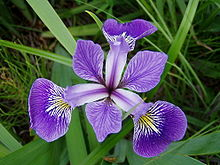
Pretty purple, huh?

You can use `df.head()` to see a sample of the data (including column names), and you can use `df.describe()` to obtain some simple statistics, for Pandas dataframe `df`.

### Tasks

Since the data actually have labels, we will ignore them for now. Using the rest of the data, write one function to assign each data point to its closest centroid, and another to compute new centroids, given data in a cluster. Write another function that combines these in the actual k-means algorithm, and then compare your implementation against scikit-learn

Complete each of the code cells below according to the instructions in the comments. For each section, markers may take away marks for excessively poor quality code, at their discretion.



In [2]:
# 1. load the data in Pandas DataFrames. 
#    Separate each dataset into independent observations/features data (XDeli and XIris) and outcome labels (yDeli and yIris). 
#    You can perform this separation in two lines, for each dataset. Look up the pandas 'drop()' function and indexing if you need to. 

dataDeli = pd.read_csv('https://github.com/davidjohnnn/all_datasets/raw/master/bay/cs-training.csv').drop('Unnamed: 0', axis = 1)
dataIris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv') # the `datasets.load_iris()` fcn is similar but different

dataDeli.dropna(axis=0, inplace=True)
dataIris.dropna(axis=0, inplace=True)

# TODO: your code goes here, below. Be sure to handle potential errors. 
#   

XDeli = dataDeli.drop("SeriousDlqin2yrs", axis=1)
yDeli = dataDeli["SeriousDlqin2yrs"]

XIris = dataIris.drop("species", axis=1)
yIris = dataIris["species"]

display(dataDeli)
display(XIris.shape)
display(yIris.shape)

#Citations for Section 1:
#https://www.youtube.com/watch?v=b3jmal-YEJQ
#https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
#https://numpy.org/doc/stable/reference/generated/numpy.argmin.html
#https://stackoverflow.com/questions/20111698/obtaining-highest-negative-value-to-end-of-data
#https://www.naukri.com/learning/articles/how-to-compute-euclidean-distance-in-python/
#https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
#https://www.youtube.com/watch?v=a83EwoIPazg
#https://www.youtube.com/watch?v=IB9WfafBmjk&t=1372s
#https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670
#https://www.youtube.com/watch?v=1Azmr-wOeU0
#https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
#Used chatgpt to explain linalg.norm to understand the function better, as well as argmin after doing my own research into the functions to make sure I understood them.

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                      1                              0.766127   45   
1                      0                              0.957151   40   
2                      0                              0.658180   38   
3                      0                              0.233810   30   
4                      0                              0.907239   49   
...                  ...                                   ...  ...   
149994                 0                              0.385742   50   
149995                 0                              0.040674   74   
149996                 0                              0.299745   44   
149998                 0                              0.000000   30   
149999                 0                              0.850283   64   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                          2   0.802982         9120.0   
1                                          0   0.121876         2600.0   
2                                          1   0.085113         3042.0   
3                                          0   0.036050         3300.0   
4                                          1   0.024926        63588.0   
...                                      ...        ...            ...   
149994                                     0   0.404293         3400.0   
149995                                     0   0.225131         2100.0   
149996                                     0   0.716562         5584.0   
149998                                     0   0.000000         5716.0   
149999                                     0   0.249908         8158.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                    13                        0   
1                                     4                        0   
2                                     2                        1   
3                                     5                        0   
4                                     7                        0   
...                                 ...                      ...   
149994                                7                        0   
149995                                4                        0   
149996                                4                        0   
149998                                4                        0   
149999                                8                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                                  6                                     0   
1                                  0                                     0   
2                                  0                                     0   
3                                  0                                     0   
4                                  1                                     0   
...                              ...                                   ...   
149994                             0                                     0   
149995                             1                                     0   
149996                             1                                     0   
149998                             0                                     0   
149999                             2                                     0   

        NumberOfDependents  
0                      2.0  
1                      1.0  
2                      0.0  
3                      0.0  
4                      0.0  
...                    ...  
149994                 0.0  
149995                 0.0  
149996                 2.0  
149998                 0.0  
149999                 0.0  

[120269 rows x 11 columns]

(150, 4)

(150,)

In [29]:
# 2. Find the closest centroids to each datum. Use the sum of squared distances for each column.
#    
def findNearestCentroids(X, centroids):
#        inputs:  'X':          pandas df      A complete pandas dataframe of observations data.
#                 'centroids':  pandas df      A dataframe holding the K centroids (there are K rows), 
#                                              with the same column types as X.   
#        output:  'assign':     list of ints   A mapping of the data in X with the centroids in 'centroids'
#                                              i.e., if row 42 in 'X' is closest to row 3 in 'centroids', 
#                                                    then element 42 in 'assign' is '3'.

    # TODO: your code goes here
    assign = []
    #iterating over df X.  
    for i in range(len(X)):
        #using linalg.norm to calculate the euclidian distance between each data point in X and each centroid
        #Had to reshape to remove error of size differences between centroids and X (idea from https://www.youtube.com/watch?v=1Azmr-wOeU0)
        x = X.iloc[i].to_numpy().reshape(1,-1)
        cent_dist = np.linalg.norm(x-centroids, axis=1)
        #using argmin to calculate the minimum distance for each data point and centroid
        min_dist = np.argmin(cent_dist)
        #appending the minimum distance to the list
        assign.append(min_dist)
        
    return assign

#Notes:
#Double for loop not needed in this instance.
#Use linalg.norm for calculating euclidian distance instead of math.dist() or another calculation (X-centroids**2) (easier)

In [17]:
# 3. Find centroids. For each cluster 'i', defined by indices in 'assign', compute the mean value and 
#                    return it in the ith row of 'centroids'
#
def findCentroids( X, assign, k):
#        inputs:  'X':          pandas df      A complete pandas dataframe of observations data.
#                 'assign':     list of ints   The same list of ints as the output of 'findNearestCentroids'
#                 'k':          integer        The hyper-parameter 'k'
#        output:  'centroids':  pandas df      A dataframe holding the K centroids (there are K rows), 
#                                              with the same column types as X.  

    # TODO: your code goes here
    centroids = []
    #should run for as many 'k' is passed in from experiment
    for i in range(k):
        index = []
        for j in range(len(assign)):
            if assign[j]==i:
                index.append(j)
        clusters = X.iloc[index]        
        centroids.append(np.mean(clusters,axis=0))
    return centroids


#idx = assign? Im just changing idx to assign in the args to line up with instructions
#Citations:
#https://www.youtube.com/watch?v=IB9WfafBmjk&t=1372s

In [ ]:
# 4. Run k-means clustering. Your initial centroids are random (without replacement) rows from 'X'
#
def my_kmeans( X, k, max_iter):
#        inputs:  'X':          pandas df      A complete pandas dataframe of observations data.
#                 'k':          integer        The hyper-parameter 'k'
#                 'max_iter':   integer        The hyper-parameter setting the maximum number of iterations to make
#        output:  'centroids':  pandas df      A dataframe holding the K centroids (there are K rows), 
#                                              with the same column types as X. 
#                 'assign':     list of ints   A mapping of the data in X with the centroids in 'centroids'
#                                              i.e., if row 42 in 'X' is closest to row 3 in 'centroids', 
#                                                    then element 42 in 'assign' is '3'.

    #initalizing assign to all 0's to counter an error I previously got
    assign = np.zeros(len(X))
    # TODO: your code goes here
    #iterate for max amount of iterations given
    for i in range(max_iter):
        #compute centroids
        centroids = findCentroids(X, assign, k)
        #calculate the nearest centroids
        assign = findNearestCentroids(X, centroids)
    return centroids, assign

In [ ]:
# 5. Run a very simple experiment. For different values of k (provided), map your centroids to the nearest 
#    centroids from scikit-learn's implementation, and then return the AVERAGE distance between nearest pairs
#    You might have realized that you can use your own findNearestCentroids function, since both arguments
#    are Pandas dataframes
#
#    The output will just be 8 floating point numbers -- one on each line for each value of k, below, on each of the two datasets.
#    Output results for the GiveMeSomeCredit data first, then the results from the Iris dataset
# 

max_iter = 300

for k in [2, 3, 5, 10]:
    
    # TODO: your code goes here, at least to select the appropriate data
    #       note that sklearn's 'fit' function takes numpy as input. 
    
    X = XDeli
    y = yDeli
    Xiris = XIris
    Yiris = YIris
    
    #for whatever reason, n_init was interpretting as a string, so I changed it to 10
    theirMeans = KMeans(n_clusters=k, random_state=0, max_iter=max_iter, n_init=10).fit(X.to_numpy())
    myMeans,_  = my_kmeans( X, k, max_iter )
    theirMeansIris = KMeans(n_clusters=k, random_state=0, max_iter=max_iter, n_init=10).fit(Xiris.to_numpy())
    myMeansIris,_  = my_kmeans( Xiris, k, max_iter )
    
    
    theirCentroids = theirMeans.cluster_centers_
    theirDistances = pairwise_distances(theirCentroids)
    print(myMeans)
    
    theirCentroidsIris = theirMeansIris.cluster_centers_
    theirDistancesIris = pairwise_distances(theirCentroidsIris)
    print(myMeansIris)

    
    myDistances = pairwise_distances(myMeans)
    myDistancesIris = pairwise_distances(myMeansIris)
    
    theirAvg = np.mean(theirDistances, axis=1)
    myAvg = np.mean(myDistances, axis=1)
    theirAvgIris = np.mean(theirDistancesIris, axis=1)
    myAvgIris = np.mean(myDistancesIris, axis=1)

    print("GiveMeSomeCredit: ")
    print("Theirs: " + theirAvg)
    print("Mine: " + myAvg)
    
    print("Iris: ")
    print("Theirs: " + theirAvgIris)
    print("Mine: " + myAvgIris)

#Trying to use pairwise_distances to calculate distance between pairs, but the documentation is not very good
#No idea why, when I print myMeans for Iris that its all NaN.  Remember to test on Deli as well.
#I have made a grave error and forgotten to take a subset of the GiveMeSomeCredit dataset for this question.  I am currently on minute 34 waiting for kernel to stop.

### Assessment for section 1

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Load          |     | / 1     |           |
| 2  | findNearestCentroids()  |     | / 2     |           |
| 3  | findCentroids()  |     | / 2     |           |
| 4  | my_kmeans()          |     | / 2     |           |
| 5  | experiments          |     | / 1     |           |
| -  | TOTAL         |     | / 8      |           |


## Section 2 - Classification

Here, we will actually make use of the labels in our two datasets to do some very simple classification. We will use three builtin classifiers from sklearn, use `fit()` to learn the models on training sets and use `predict()` to make predictions on test sets.

We will use:
- [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
- [Support vector machines](https://scikit-learn.org/stable/modules/svm.html)
- [Simple neural networks](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised)

Complete each of the code cells below according to the instructions in the comments. For each section, markers may take away marks for excessively poor quality code, at their discretion.

In [3]:
# 1. Split each dataset into training and testing sets using sklearn's builtin `train_test_split` function
#    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.
#
#    Each dataset will have four variables: X_train, X_test, y_train, and y_test, for observations X and labels y

# TODO: your code goes here
#display(dataDeli.head())
#display(dataIris.head())

#Trying to use a labelEncoder to fix the categorical column so I can use fitting properly.
labelencoder = LabelEncoder()
species = dataIris['species']
species = labelencoder.fit_transform(species)
#creating a new dataframe with all original data, and concating species back in a numerical form to use for fitting purposes
new_iris = pd.DataFrame({'sepal_length':dataIris['sepal_length'], 'sepal_width':dataIris['sepal_width'], 'petal_length':dataIris['petal_length'],
                        'petal_width':dataIris['petal_width']})
print("New Iris:", new_iris)


new_deli = dataDeli.sample(frac = 0.1)
display(new_deli)
target = new_deli["SeriousDlqin2yrs"]
target = labelencoder.fit_transform(target)
new_deli = pd.DataFrame({'RevolvingUtilizationOfUnsecuredLines':new_deli['RevolvingUtilizationOfUnsecuredLines'], 'age':new_deli['age'],
                        'NumberOfTime30-59DaysPastDueNotWorse':new_deli['NumberOfTime30-59DaysPastDueNotWorse'], 'DebtRatio': new_deli['DebtRatio'],
                        'MonthlyIncome':new_deli['MonthlyIncome'], 'NumberOfOpenCreditLinesAndLoans':new_deli['NumberOfOpenCreditLinesAndLoans'],
                        'NumberOfTimes90DaysLate':new_deli['NumberOfTimes90DaysLate'], 'NumberRealEstateLoansOrLines':new_deli['NumberRealEstateLoansOrLines'],
                        'NumberOfTime60-89DaysPastDueNotWorse':new_deli['NumberOfTime60-89DaysPastDueNotWorse'], 'NumberOfDependents':new_deli['NumberOfDependents']})

display(new_deli)
print("New Deli: ",new_deli)
X_train_deli, X_test_deli, Y_train_deli, Y_test_deli = train_test_split(new_deli, target, test_size=0.33, random_state=1)
X_train_iris, X_test_iris, Y_train_iris, Y_test_iris = train_test_split(new_iris, species, test_size=0.33, random_state=1)

display(X_train_deli)
display(X_train_iris)

						


#Citations for labelEncoder:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
#https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
#I wonder why when I drop species from iris dataset that I get less than 1 results, but when added everything is 1 (ie: recall, prec, f1)

New Iris:      sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
32326                  0                              0.036519   31   
11633                  0                              0.000694   46   
77189                  0                              0.315068   47   
30777                  0                              0.024718   89   
111611                 0                              1.000000   49   
...                  ...                                   ...  ...   
10700                  1                              0.000888   85   
143824                 1                              0.767854   32   
148629                 0                              0.520317   51   
136005                 0                              0.078953   74   
22432                  0                              0.077261   48   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
32326                                      0   0.287005         8633.0   
11633                                      0   0.303874         5600.0   
77189                                      1   0.710822         4000.0   
30777                                      0   0.002666         6000.0   
111611                                     1   0.330795         2100.0   
...                                      ...        ...            ...   
10700                                      0   0.009998         6000.0   
143824                                     2   0.456411         5700.0   
148629                                     0   0.317559         7733.0   
136005                                     0   0.018997         6000.0   
22432                                      0   2.758725         5300.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
32326                                 7                        0   
11633                                10                        1   
77189                                11                        0   
30777                                 3                        0   
111611                                4                        0   
...                                 ...                      ...   
10700                                17                        0   
143824                                8                        3   
148629                                8                        0   
136005                                3                        0   
22432                                 6                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
32326                              1                                     0   
11633                              2                                     0   
77189                              2                                     0   
30777                              0                                     0   
111611                             0                                     1   
...                              ...                                   ...   
10700                              1                                     0   
143824                             0                                     0   
148629                             1                                     0   
136005                             0                                     0   
22432                              0                                     0   

        NumberOfDependents  
32326                  0.0  
11633                  3.0  
77189                  3.0  
30777                  0.0  
111611                 0.0  
...                    ...  
10700                  0.0  
143824                 2.0  
148629                 1.0  
136005                 1.0  
22432                  6.0  

[12027 rows x 11 columns]

RevolvingUtilizationOfUnsecuredLines  age  \
32326                               0.036519   31   
11633                               0.000694   46   
77189                               0.315068   47   
30777                               0.024718   89   
111611                              1.000000   49   
...                                      ...  ...   
10700                               0.000888   85   
143824                              0.767854   32   
148629                              0.520317   51   
136005                              0.078953   74   
22432                               0.077261   48   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
32326                                      0   0.287005         8633.0   
11633                                      0   0.303874         5600.0   
77189                                      1   0.710822         4000.0   
30777                                      0   0.002666         6000.0   
111611                                     1   0.330795         2100.0   
...                                      ...        ...            ...   
10700                                      0   0.009998         6000.0   
143824                                     2   0.456411         5700.0   
148629                                     0   0.317559         7733.0   
136005                                     0   0.018997         6000.0   
22432                                      0   2.758725         5300.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
32326                                 7                        0   
11633                                10                        1   
77189                                11                        0   
30777                                 3                        0   
111611                                4                        0   
...                                 ...                      ...   
10700                                17                        0   
143824                                8                        3   
148629                                8                        0   
136005                                3                        0   
22432                                 6                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
32326                              1                                     0   
11633                              2                                     0   
77189                              2                                     0   
30777                              0                                     0   
111611                             0                                     1   
...                              ...                                   ...   
10700                              1                                     0   
143824                             0                                     0   
148629                             1                                     0   
136005                             0                                     0   
22432                              0                                     0   

        NumberOfDependents  
32326                  0.0  
11633                  3.0  
77189                  3.0  
30777                  0.0  
111611                 0.0  
...                    ...  
10700                  0.0  
143824                 2.0  
148629                 1.0  
136005                 1.0  
22432                  6.0  

[12027 rows x 10 columns]

New Deli:          RevolvingUtilizationOfUnsecuredLines  age  \
32326                               0.036519   31   
11633                               0.000694   46   
77189                               0.315068   47   
30777                               0.024718   89   
111611                              1.000000   49   
...                                      ...  ...   
10700                               0.000888   85   
143824                              0.767854   32   
148629                              0.520317   51   
136005                              0.078953   74   
22432                               0.077261   48   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
32326                                      0   0.287005         8633.0   
11633                                      0   0.303874         5600.0   
77189                                      1   0.710822         4000.0   
30777                                      0   0.002666 

RevolvingUtilizationOfUnsecuredLines  age  \
60349                               0.136876   31   
82549                               0.602684   73   
39515                               0.006965   69   
15986                               0.433531   59   
7351                                0.053092   42   
...                                      ...  ...   
26018                               0.545804   45   
141870                              0.070109   56   
11296                               0.697130   35   
36998                               0.028368   46   
55746                               0.290774   37   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
60349                                      0   0.892221         2300.0   
82549                                      0   0.243820         8333.0   
39515                                      1   0.385831         5250.0   
15986                                      0   0.294585        22916.0   
7351                                       0   0.554767         7750.0   
...                                      ...        ...            ...   
26018                                      1   0.426038         4116.0   
141870                                     0   0.427304         5295.0   
11296                                      1   0.433084         8166.0   
36998                                      0   0.014746         4000.0   
55746                                      0   0.852716         3000.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
60349                                16                        0   
82549                                10                        0   
39515                                10                        1   
15986                                19                        0   
7351                                 16                        0   
...                                 ...                      ...   
26018                                 3                        4   
141870                               12                        0   
11296                                 9                        0   
36998                                 5                        0   
55746                                12                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
60349                              1                                     0   
82549                              1                                     0   
39515                              2                                     0   
15986                              2                                     0   
7351                               1                                     1   
...                              ...                                   ...   
26018                              1                                     0   
141870                             1                                     0   
11296                              2                                     0   
36998                              0                                     0   
55746                              0                                     0   

        NumberOfDependents  
60349                  0.0  
82549                  0.0  
39515                  1.0  
15986                  3.0  
7351                   2.0  
...                    ...  
26018                  0.0  
141870                 3.0  
11296                  0.0  
36998                  0.0  
55746                  0.0  

[8058 rows x 10 columns]

sepal_length  sepal_width  petal_length  petal_width
39            5.1          3.4           1.5          0.2
36            5.5          3.5           1.3          0.2
117           7.7          3.8           6.7          2.2
139           6.9          3.1           5.4          2.1
107           7.3          2.9           6.3          1.8
..            ...          ...           ...          ...
133           6.3          2.8           5.1          1.5
137           6.4          3.1           5.5          1.8
72            6.3          2.5           4.9          1.5
140           6.7          3.1           5.6          2.4
37            4.9          3.6           1.4          0.1

[100 rows x 4 columns]

In [4]:
# 2. Scale the data. Some classifiers can have difficulty if the inputs are not normalized
#    We use sklearn's StandardScaler (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
#    

scalerDeli = StandardScaler()
scalerIris = StandardScaler()

# TODO scale only on the respective training data, using scaler.fit(X_train)
# TODO now overwrite both the training and testing data with their scaled versions using  X = scaler.transform(X)
scalerDeli.fit(X_train_deli)
X_train_deli = scalerDeli.transform(X_train_deli)
X_test_deli = scalerDeli.transform(X_test_deli)
#display(X_train_deli)
#display(X_test_deli)

scalerIris.fit(X_train_iris)
X_train_iris = scalerIris.transform(X_train_iris)
X_test_iris = scalerIris.transform(X_test_iris)

#how to get rid of species column..tried both, got different results.  With labelencoder (see previous code block), got all 1s (prec, acc, f1), but by dropping species got different results

In [5]:
# 3. Train models. Each of the following models uses the fit(X,y) function, which learns a mapping from training observations X 
#                  to their respective labels y, which you already have for each dataset. Use the scaled inputs in all cases.
#                  You will have 6 models -- one for each model type in each of the two datasets.
#
#    For Naive Bayes, use https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
#                     with no parameters
#    For SVM, use https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
#             with kernel="poly", degree=3, gamma="auto", C=1.0
#    For the neural network, use https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
#                            with solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1
#

# TODO: your code goes here

bayes_deli = GaussianNB()
bayes_deli.fit(X_train_deli, Y_train_deli)
bayes_iris = GaussianNB()
bayes_iris.fit(X_train_iris, Y_train_iris)

from sklearn.svm import SVC
svm_deli = SVC(kernel="poly", degree=3, gamma="auto", C=1.0)
svm_deli.fit(X_train_deli, Y_train_deli)
svm_iris = SVC(kernel="poly", degree=3, gamma="auto", C=1.0)
svm_iris.fit(X_train_iris, Y_train_iris)

neural_deli = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)
neural_deli.fit(X_train_deli, Y_train_deli)
neural_iris = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)
neural_iris.fit(X_train_iris, Y_train_iris)

#remember to fit after each model

C:\Users\jmcki\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jmcki\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1,
              solver='lbfgs')

In [6]:
# 4. Make predictions. Each of the 6 models (that used the fit(X,y) function) also takes a precict(X) function that outputs
#                      predicted labels given data X, which will be our test data split from each dataset
#
#                      For each model, get the predictions on the test set of the respective dataset, and then compare
#                      these predictions against the known true labels (y_test) using the `classification_report` function
#                      (see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
#
#                      The output will just be 6 reports -- one for each classifier, on each of the two datasets.
#                      Output results for the GiveMeSomeCredit data first, then the results from the Iris dataset



# TODO: your code goes here
bayes_prediction = bayes_deli.predict(X_test_deli)
classification_deli = classification_report(Y_test_deli, bayes_prediction)
bayes_prediction2 = bayes_iris.predict(X_test_iris)
classification_iris = classification_report(Y_test_iris, bayes_prediction2)
print("Bayes results (GiveMeSomeCredit first, Iris second): ")
print(classification_deli)
print(classification_iris)

svm_prediction = svm_deli.predict(X_test_deli)
classification_svm_deli = classification_report(Y_test_deli, svm_prediction)
svm_prediction2 = svm_iris.predict(X_test_iris)
classification_svm_iris = classification_report(Y_test_iris, svm_prediction2)
print("SVM results(GiveMeSomeCredit first, Iris second): ")
print(classification_svm_deli)
print(classification_svm_iris)

neural_prediction = neural_deli.predict(X_test_deli)
classification_neural_deli = classification_report(Y_test_deli, neural_prediction)
neural_prediction2 = neural_iris.predict(X_test_iris)
classification_neural_iris = classification_report(Y_test_iris, neural_prediction2)
print("Neural Network results(GiveMeSomeCredit first, Iris second): ")
print(classification_neural_deli)
print(classification_neural_iris)

print("Bayes:")
from sklearn.metrics import accuracy_score
deli_accuracy_bayes = accuracy_score(Y_test_deli, bayes_prediction)
iris_accuracy_bayes = accuracy_score(Y_test_iris, bayes_prediction2)
print(deli_accuracy_bayes)
print(iris_accuracy_bayes)
print("---------------------------------------")
print("SVM")
deli_accuracy_svm =accuracy_score(Y_test_deli, svm_prediction)
iris_accuracy_svm =accuracy_score(Y_test_iris, svm_prediction2)
print(deli_accuracy_svm)
print(iris_accuracy_svm)
print("---------------------------------------")
print("NN")
deli_accuracy_nn =accuracy_score(Y_test_deli, neural_prediction)
iris_accuracy_nn =accuracy_score(Y_test_iris, neural_prediction2)
print(deli_accuracy_nn)
print(iris_accuracy_nn)


Bayes results (GiveMeSomeCredit first, Iris second): 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3714
           1       0.34      0.18      0.24       255

    accuracy                           0.92      3969
   macro avg       0.64      0.58      0.60      3969
weighted avg       0.91      0.92      0.91      3969

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.89      0.92        19
           2       0.87      0.93      0.90        14

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

SVM results(GiveMeSomeCredit first, Iris second): 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3714
           1       0.25      0.00      0.01       255

    accuracy           

5. Add 2-3 sentences interpreting the output from the previous step. At the least, 1) compare overall results across datasets and try to explain why they may be different; 2) compare results across classifiers and try to explain why they may be different. There is no single right answer -- you are meant to show that you can read confusion matrices, that you know the basic theory behind the three classifiers, and that you can assess how differences in the datasets may relate to performance

TODO your observations go here:

After reviewing my results from my models, I can say that, while all models performed admirably, the SVM and NN performed slightly better across the board for both the GiveMeSomeCredit and Iris datasets than the Bayes did (Accuracy scores of .935 and .936 for SVM and NN vs .92 for Bayes for GiveMeSomeCredit; .98 and .98 for SVM and NN vs. .94 for Bayes for Iris).  Looking at the results for GiveMeSomeCredit, I can see that all three models are MUCH better at classifying target negatives vs target positive ones (results for 0 as opposed to results for 1).  

However, after reviewing the results from the Iris dataset and its models, I can see that all three models perform similarly with regards to classifying the target species(0,1,2 respectively).  However, when diving deeper into the models results, there are some minor differences in each of the models.  For instance, in the SVM model, the results for the setosa are identical to the results from the NN model.  However, when looking at the versicolor, the results differ slightly (0.95 prec, 1.00 accuracy, 0.97 f1 as opposed to  1.00 prec, 0.95 accuracy, 0.97 f1).  The results also differ in the virginica category, albiet slightly.  Comparing to the Bayes results, you can see that the Bayes results are coming in less (worse) than both the NN and the SVM across the board. 

There may be several reasons behind the differences in model accuracy.  The Iris dataset is much smaller than the GiveMeSomeCredit, with far fewer data points, and is used as a training dataset for students.  It does not have much in the way of variability, which could easily lead to a very high accuracy score, precision score, recall score, and f1 score.  I must also take into consideration that the GiveMeSomeCredit models only have a subset of the actual dataset, which will impact the models (although I cannot tell if it will be a negative or positive impact without testing the whole dataset, and my laptop CANNOT handle that).

Citations:
https://medium.com/ml-cheat-sheet/machine-learning-evaluation-metrics-b89b8832e275
https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

### Assessment for section 2

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Split       |     | /1      |           |
| 2  | Scale          |     | /1    |           |
| 3  | Train  |     | /3      |           |
| 4  | Test   |     | /3      |           |
| 5  | Interpret |   | /2  | |
| -  | TOTAL         |     | /10     |           |

## Bonus [3 Marks]

- We will give up to 3 bonus marks for innovative work going substantially beyond the minimal requirements and, possibly, for in-class participation. 
- These marks can make up for marks lost in other sections of the assignment, but your overall mark for this assignment cannot exceed 100%. 
- You may decide to pursue any number of tasks of your own design related to this assignment, although you should consult with the instructor or the lead TA before embarking on such exploration, and the value of bonus work is left to the discretion of the markers. 
- Be sure to document your work sufficiently for the markers to understand what you're doing. You can add additional Code or MarkDown cells below, as necessary.
- Certainly, the rest of the assignment takes higher priority. 

Some ideas:

- In Section 1, check to see how well the discovered clusters actually map onto the real labels. That would be cool.
- Run PCA (see Lec03.pca.ipynb) on the data in Section 1 before running k-means and report on the differences in performance for different numbers of principal components used
- Run PCA (see Lec03.pca.ipynb) on the data in Section 2 before running classification and report on the differences in performance for different numbers of principal components used
- Explore the space of classifiers. Try different types of classifiers and different hyper-parameters (e.g., for SVMs, use different kernels; for neural networks, use different numbers of layers or nodes per layer). Report critically on the results you find.


In [ ]:
# BONUS Section

# TODO YOUR CODE GOES HERE

### Assessment for bonus section

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Bonus         |     | /3      |           |


## Academic Integrity

The following is template information. If there is any ambiguity or contradiction with official Dalhousie University policies, those Dalhousie University policies take effect.

At Dalhousie University, we respect the values of academic integrity: honesty, trust, fairness, responsibility, and respect. As a student, adherence to the values of academic integrity and related policies is a requirement of being part of the academic community at Dalhousie University.

### What does academic integrity mean?

Academic integrity means being honest in the fulfillment of your academic responsibilities thus establishing mutual trust. Fairness is essential to the interactions of the academic community and is achieved through respect for the opinions and ideas of others. Violations of intellectual honesty are oﬀensive to the entire academic community, not just to the individual faculty member and students in whose class an oﬀence occur (See the Dalhousie Secretariat's page on [Academic Integrity](https://www.dal.ca/dept/university_secretariat/academic-integrity.html).

### How can you achieve academic integrity?

- Make sure you understand Dalhousie’s policies on academic integrity.
- Give appropriate credit to the sources used in your assignment such as written or oral work, computer codes/programs, artistic or architectural works, scientific projects,  performances,  web page designs, graphical representations, diagrams, videos, and images. Use [RefWorks](http://www.library.dal.ca/How/RefWorks) to keep track of your research and edit and format bibliographies in the citation style required by the instructor.
- Do not download the work of another from the Internet and submit it as your own.
- Do not submit work that has been completed through collaboration or previously submitted for another assignment without permission from your instructor.
- Do not write an examination or test for someone else.
- Do not falsify data or lab results.

These examples should be considered only as a guide and not an exhaustive list.

### What will happen if an allegation of an academic oﬀence is made against you?

The teaching team is required to report any suspected oﬀence. The full process is outlined in the Discipline flow chart, which can be found [here](https://cdn.dal.ca/content/dam/dalhousie/pdf/dept/university_secretariat/FDPflowchartSEpt2016.pdf) and includes the following:

1. Each Faculty has an Academic Integrity Oﬃcer (AIO) who receives allegations from instructors.
2. The AIO decides whether to proceed with the allegation and you will be notified of the process.
3. If the case proceeds, you will receive an INC (incomplete) grade until the matter is resolved.
4. If you are found guilty of an academic oﬀence, a penalty will be assigned ranging from a warning to a suspension or expulsion from the University and can include a notation on your transcript, failure of the assignment or failure of the course. All penalties are academic in nature.

### Where can you turn for help?

- If you are ever unsure about ANYTHING, contact the teaching team or lead instructor.
- The Academic Integrity website (http://academicintegrity.dal.ca) has links to policies, definitions, online tutorials, tips on citing and paraphrasing.
- The Writing Center provides assistance with proofreading, writing styles, citations.
- Dalhousie Libraries have workshops, online tutorials, citation guides, Assignment Calculator, RefWorks, etc.
- The Dalhousie Student Advocacy Service assists students with academic appeals and student discipline procedures.
- The Senate Oﬃce provides links to a list of Academic Integrity Oﬃcers, discipline flow chart, and Senate Discipline Committee.


## Academic offenses

There is a zero-tolerance policy on academic offenses such as plagiarism or inappropriate collaboration. By submitting your solution for this assignment, you acknowledge that the code submitted is your own work. You also agree that your code may be submitted to plagiarism detection software (such as MOSS) unless you have notified the teaching team otherwise, in writing, before the submission deadline. Any suspected act of plagiarism will be reported to the Faculty’s Academic Integrity Officer in accordance with Dalhousie University’s regulations regarding Academic Integrity. Please note that:

1. The assignments are individual assignments. You can discuss the problems with your friends/classmates, but you need to write your program by yourself. There should not be much similarity in terms of coding. 
2. When you refer to some online resources to complete your program, you need to understand the mechanism, then write your own code. Your code should not be similar to the online resources. In addition, you should cite the sources via comments in your program.

